In [57]:
from pyDOE2 import *
import pandas as pd
import numpy as np
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [58]:
data_shuffeled = pd.read_csv("results.csv")

counter = 0
for k in range(3):
    for i in range(48):
        for j in range(5):
            data.iloc[counter] = data_shuffeled.iloc[(48*j + i)+k*240]
            counter += 1
            
training_time = data['training_time']
        

In [59]:
setup1 = data[:240:2]
training_time = setup1['accuracy'].mean()
print("Standard: ")
setup2 = data[240:480:2]
print("Hybrid: ")
acc2 = setup2['accuracy'].mean()
setup3 = data[480:720:2]
print("Optimized: ")
acc3 = setup3['accuracy'].mean()


print(((acc2 - acc1) / acc1) * 100)
print(((acc3 - acc1) / acc1) * 100)

Standard: 
Hybrid: 
Optimized: 
-25.87213082775212
-25.60363699416954


<AxesSubplot:xlabel='accuracy', ylabel='training_time'>

<Figure size 432x288 with 0 Axes>

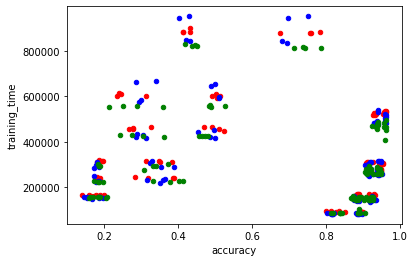

In [60]:
fig1 = plt.figure()
ax=setup1.plot.scatter(x='accuracy', y='training_time', color='r')
setup2.plot.scatter(x='accuracy', y='training_time', color='b', ax=ax)
setup3.plot.scatter(x='accuracy', y='training_time', color='g', ax=ax)

In [90]:
price_standard =  0.194236
price_optimized = 0.2088

standard_price = data['training_time'][:240] / 3600000 * (price_standard)
hybrid_price = data['training_time'][240:480] / 3600000 * (price_standard + price_optimized)/2
optimized_price = data['training_time'][480:720] / 3600000 * (price_optimized)

data['price'] = pd.concat([standard_price, hybrid_price, optimized_price])
print(data['price'])


0      0.007915
1      0.008249
2      0.008375
3      0.008540
4      0.008743
         ...   
715    0.032350
716    0.032257
717    0.032321
718    0.031988
719    0.032778
Name: price, Length: 720, dtype: float64


<AxesSubplot:xlabel='max_epochs', ylabel='price'>

<Figure size 432x288 with 0 Axes>

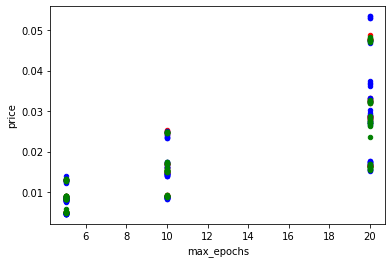

In [91]:
fig2 = plt.figure()
ax=setup1.plot.scatter(x='max_epochs', y='price', color='r')
setup2.plot.scatter(x='max_epochs', y='price', color='b', ax=ax)
setup3.plot.scatter(x='max_epochs', y='price', color='g', ax=ax)

In [100]:
means = data.copy()[:144]

for i in range (0, len(data), 5):
    means.iloc[int(i/5)] = data.iloc[i:i+5].mean()
print(means)

     Index setup  batch_size  max_epochs  learning_rate  memory_size model  \
0     96.0   NaN       128.0         5.0          0.010       6000.0   NaN   
1     97.0   NaN       128.0         5.0          0.010       6000.0   NaN   
2     98.0   NaN       128.0         5.0          0.010      12000.0   NaN   
3     99.0   NaN       128.0         5.0          0.010      12000.0   NaN   
4    100.0   NaN       128.0         5.0          0.005       6000.0   NaN   
..     ...   ...         ...         ...            ...          ...   ...   
139  619.0   NaN       256.0        20.0          0.010      12000.0   NaN   
140  620.0   NaN       256.0        20.0          0.005       6000.0   NaN   
141  621.0   NaN       256.0        20.0          0.005       6000.0   NaN   
142  622.0   NaN       256.0        20.0          0.005      12000.0   NaN   
143  623.0   NaN       256.0        20.0          0.005      12000.0   NaN   

     accuracy  training_time     price  
0     0.92274  155022.

<AxesSubplot:xlabel='max_epochs', ylabel='price'>

<Figure size 432x288 with 0 Axes>

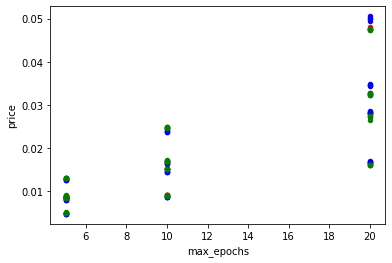

In [115]:
setup1_mean = means[:48]
setup2_mean = means[48:96]
setup3_mean = means[96:144]
fig3 = plt.figure()
ax=setup1_mean.plot.scatter(x='max_epochs', y='price', color='r')
setup2_mean.plot.scatter(x='max_epochs', y='price', color='b', ax=ax)
setup3_mean.plot.scatter(x='max_epochs', y='price', color='g', ax=ax)

In [126]:
for i in range(len(setup1_mean)):
    if setup1_mean['price'].iloc[i] < setup2_mean['price'].iloc[i] and setup1_mean['price'].iloc[i] < setup3_mean['price'].iloc[i]:
        print(str(i)  + ':standard')
    if setup2_mean['price'].iloc[i] < setup1_mean['price'].iloc[i] and setup2_mean['price'].iloc[i] < setup3_mean['price'].iloc[i]:
        print(str(i) + ':hybrid')
    if setup3_mean['price'].iloc[i] < setup1_mean['price'].iloc[i] and setup3_mean['price'].iloc[i] < setup2_mean['price'].iloc[i]:
        print(str(i) + ':optimized')

    

0:hybrid
1:hybrid
2:hybrid
3:hybrid
4:hybrid
5:hybrid
6:hybrid
7:hybrid
8:hybrid
9:hybrid
10:hybrid
11:hybrid
12:hybrid
13:hybrid
14:hybrid
15:hybrid
16:optimized
17:optimized
18:optimized
19:optimized
20:optimized
21:optimized
22:optimized
23:optimized
24:hybrid
25:hybrid
26:hybrid
27:hybrid
28:hybrid
29:hybrid
30:hybrid
31:hybrid
32:hybrid
33:hybrid
34:hybrid
35:hybrid
36:hybrid
37:hybrid
38:hybrid
39:hybrid
40:optimized
41:optimized
42:optimized
43:standard
44:optimized
45:optimized
46:optimized
47:optimized


In [127]:
index = 15
print(setup1_mean['price'].iloc[index])
print(setup2_mean['price'].iloc[index])
print(setup3_mean['price'].iloc[index])

0.02462956590963227
0.023999319488490368
0.024837502338462002


In [128]:

optimalcost = setup2_mean['price'].iloc[:15].sum() + setup3_mean['price'].iloc[15:23].sum() + setup2_mean['price'].iloc[23:39].sum() + setup3_mean['price'].iloc[39:42].sum() + setup1_mean['price'].iloc[43] + setup3_mean['price'].iloc[44:47].sum()
standardcost = setup1_mean['price'].sum()
print(optimalcost)
print(standardcost)
print((optimalcost-standardcost)/standardcost)


0.8387103496053194
0.9051177613022665
-0.07336880849780403


In [129]:
for i in range(len(setup1_mean)):
    if setup1_mean['training_time'].iloc[i] < setup2_mean['training_time'].iloc[i] and setup1_mean['training_time'].iloc[i] < setup3_mean['training_time'].iloc[i]:
        print(str(i)  + ':standard')
    if setup2_mean['training_time'].iloc[i] < setup1_mean['training_time'].iloc[i] and setup2_mean['training_time'].iloc[i] < setup3_mean['training_time'].iloc[i]:
        print(str(i) + ':hybrid')
    if setup3_mean['training_time'].iloc[i] < setup1_mean['training_time'].iloc[i] and setup3_mean['training_time'].iloc[i] < setup2_mean['training_time'].iloc[i]:
        print(str(i) + ':optimized')

0:optimized
1:optimized
2:hybrid
3:hybrid
4:hybrid
5:optimized
6:hybrid
7:optimized
8:hybrid
9:optimized
10:hybrid
11:hybrid
12:hybrid
13:hybrid
14:hybrid
15:optimized
16:optimized
17:optimized
18:optimized
19:optimized
20:optimized
21:optimized
22:optimized
23:optimized
24:hybrid
25:hybrid
26:hybrid
27:hybrid
28:hybrid
29:optimized
30:hybrid
31:hybrid
32:hybrid
33:optimized
34:hybrid
35:optimized
36:hybrid
37:optimized
38:hybrid
39:optimized
40:optimized
41:optimized
42:optimized
43:optimized
44:optimized
45:optimized
46:optimized
47:optimized


In [ ]:
optimalcost = setup2_mean['price'].iloc[:15].sum() + setup3_mean['price'].iloc[15:23].sum() + setup2_mean['price'].iloc[23:39].sum() + setup3_mean['price'].iloc[39:42].sum() + setup1_mean['price'].iloc[43] + setup3_mean['price'].iloc[44:47].sum()
standardcost = setup1_mean['price'].sum()
print(optimalcost)
print(standardcost)
print((optimalcost-standardcost)/standardcost)